In [1]:
%load_ext autoreload
%autoreload 2

In [86]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

In [87]:
df2 = pd.read_csv('./csv/gp_ts/gp_ts_2.csv')

In [88]:
df2.head()

,f_sigma,f_max,noise,alpha,beta,total_reward,seed
0,0.3,0.6,0.05,0.05,0.05,163,1
1,0.3,0.6,0.05,0.05,0.10,182,1
2,0.3,0.6,0.05,0.05,0.15,169,1
3,0.3,0.6,0.05,0.05,0.20,153,1
4,0.3,0.6,0.05,0.05,0.25,180,1


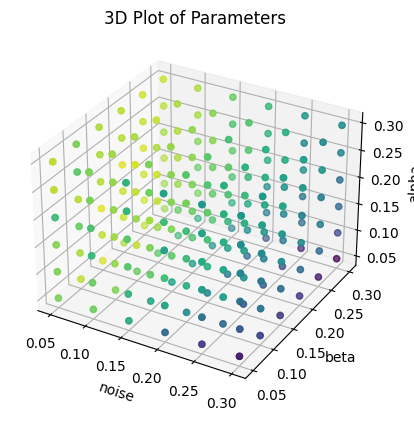

In [89]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# DataFrameから必要な列を抽出
df_subset = df2[['noise', 'alpha', 'beta', 'total_reward']]

# 3Dプロットの準備
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# データのプロット
ax.scatter(df_subset['noise'], df_subset['alpha'] ,df_subset['beta'],c=df_subset['total_reward'])

# 軸ラベルの設定
ax.set_xlabel('noise')
ax.set_ylabel('beta')
ax.set_zlabel('alpha')
ax.set_title('3D Plot of Parameters')

# グラフの表示
plt.show()


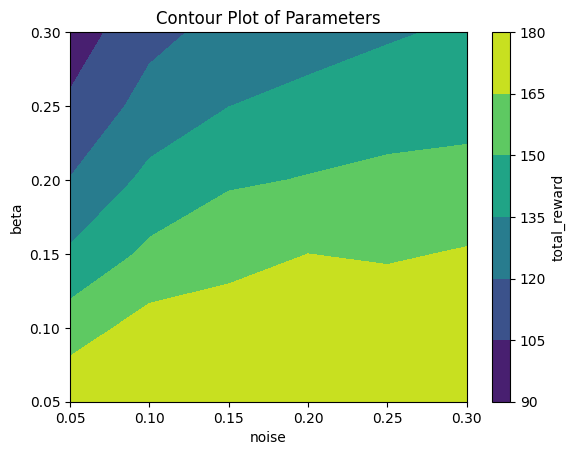

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 'noise' and 'beta' as grid and 'total_reward' as corresponding Z value
# Use groupby and mean to aggregate 'total_reward'
df_subset = df_subset.groupby(['noise', 'beta'])['total_reward'].mean().reset_index()

# Now we pivot the data
pivot_table = df_subset.pivot(index='noise', columns='beta', values='total_reward')

# We might have to fill NaN values if your data doesn't cover the full grid
pivot_table = pivot_table.fillna(0)

X = pivot_table.columns.values
Y = pivot_table.index.values
Z = pivot_table.values

# We have to make sure that X and Y are 2D to match the dimensions of Z
X, Y = np.meshgrid(X, Y)

plt.contourf(X, Y, Z)
plt.xlabel('noise')
plt.ylabel('beta')
plt.colorbar(label='total_reward')
plt.title('Contour Plot of Parameters')
plt.show()


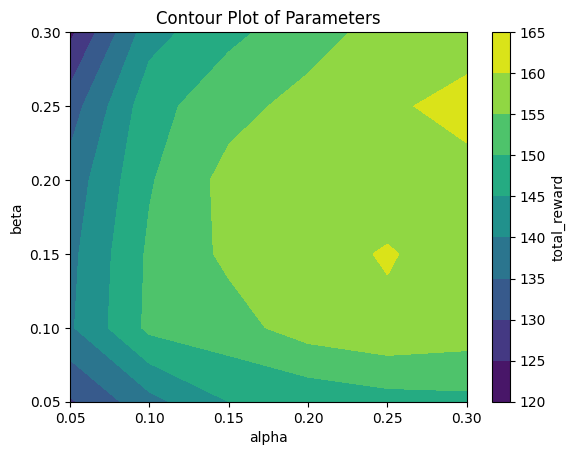

In [53]:

df_subset = df[['noise', 'alpha', 'beta', 'total_reward']]
df_subset = df_subset.groupby(['alpha', 'beta'])['total_reward'].mean().reset_index()
pivot_table = df_subset.pivot(index='alpha', columns='beta', values='total_reward')
pivot_table = pivot_table.fillna(0)

X = pivot_table.columns.values
Y = pivot_table.index.values
Z = pivot_table.values
X, Y = np.meshgrid(X, Y)
plt.contourf(X, Y, Z)
plt.xlabel('alpha')
plt.ylabel('beta')
plt.colorbar(label='total_reward')
plt.title('Contour Plot of Parameters')
plt.show()

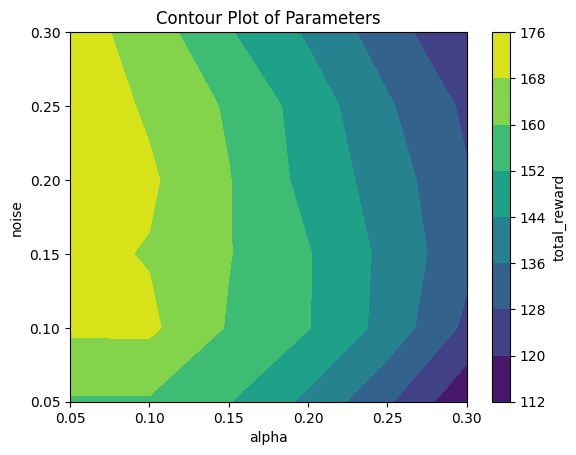

In [54]:
df_subset = df[['noise', 'alpha', 'beta', 'total_reward']]
df_subset = df_subset.groupby(['alpha', 'noise'])['total_reward'].mean().reset_index()
pivot_table = df_subset.pivot(index='alpha', columns='noise', values='total_reward')
pivot_table = pivot_table.fillna(0)

X = pivot_table.columns.values
Y = pivot_table.index.values
Z = pivot_table.values
X, Y = np.meshgrid(X, Y)
plt.contourf(X, Y, Z)
plt.xlabel('alpha')
plt.ylabel('noise')
plt.colorbar(label='total_reward')
plt.title('Contour Plot of Parameters')
plt.show()

In [58]:
df = pd.read_csv('./csv/gp_ts/gp_ts.csv')

In [59]:
df.head()

,f_sigma,f_max,noise,alpha,beta,seed,play_time,select_arm,reward
0,0.3,0.6,0.05,0.05,0.05,1,0,0.968262,0
1,0.3,0.6,0.05,0.05,0.05,1,1,0.233666,0
2,0.3,0.6,0.05,0.05,0.05,1,2,0.754891,0
3,0.3,0.6,0.05,0.05,0.05,1,3,0.505742,0
4,0.3,0.6,0.05,0.05,0.05,1,4,0.328361,0


In [96]:
f_df = df[(df['noise'] == 0.05) & (df['beta'] == 0.05) &  (df['alpha'] == 0.15) &  (df['seed'] == 1)]

In [97]:
r_df = f_df[['play_time', 'select_arm', 'reward']]

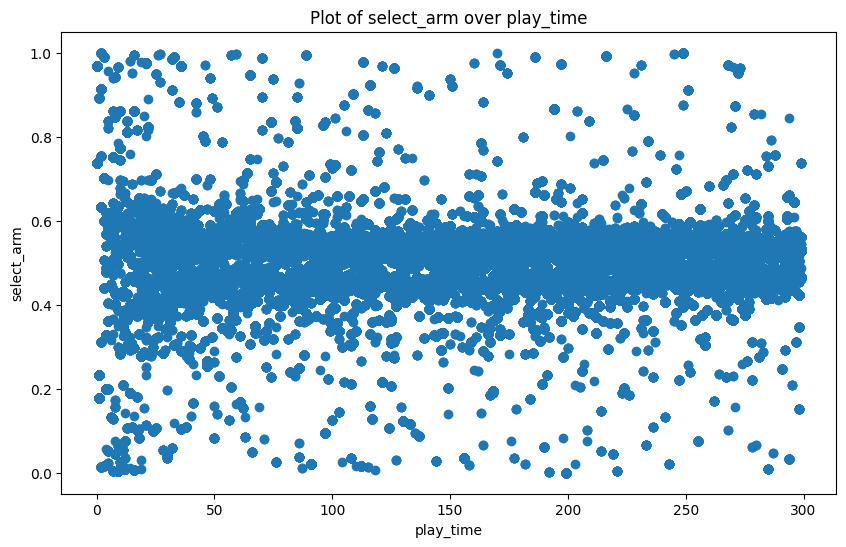

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['play_time'], df['select_arm'], marker='o')
plt.xlabel('play_time')
plt.ylabel('select_arm')
plt.title('Plot of select_arm over play_time')
plt.show()

In [92]:
max_reward = df_subset['total_reward'].max()
max_reward_records = df_subset[df_subset['total_reward'] == max_reward]
max_reward_records

,noise,alpha,beta,total_reward
14,0.05,0.15,0.15,186
17,0.05,0.15,0.30,186
